# Importar datos

In [1]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 78% 20.0M/25.7M [00:00<00:00, 106MB/s] 
100% 25.7M/25.7M [00:00<00:00, 114MB/s]


In [2]:
!unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [3]:
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
data=pd.read_csv('IMDB Dataset.csv')
data.head(9)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative


# Análisis exploratorio

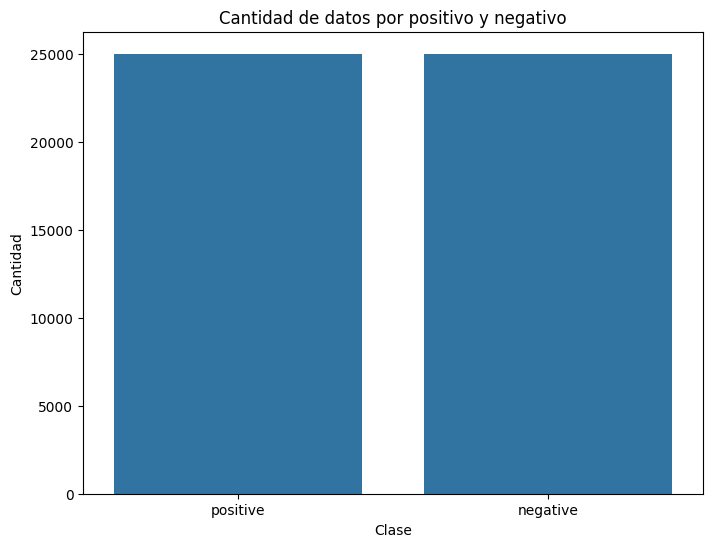

In [5]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting labels from the data
labels = [label for  label in data['sentiment']]
label_counts = Counter(labels)

# Gráfico de barras para mostrar la cantidad de datos por "positivo" y "negativo"
plt.figure(figsize=(8, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title('Cantidad de datos por positivo y negativo')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

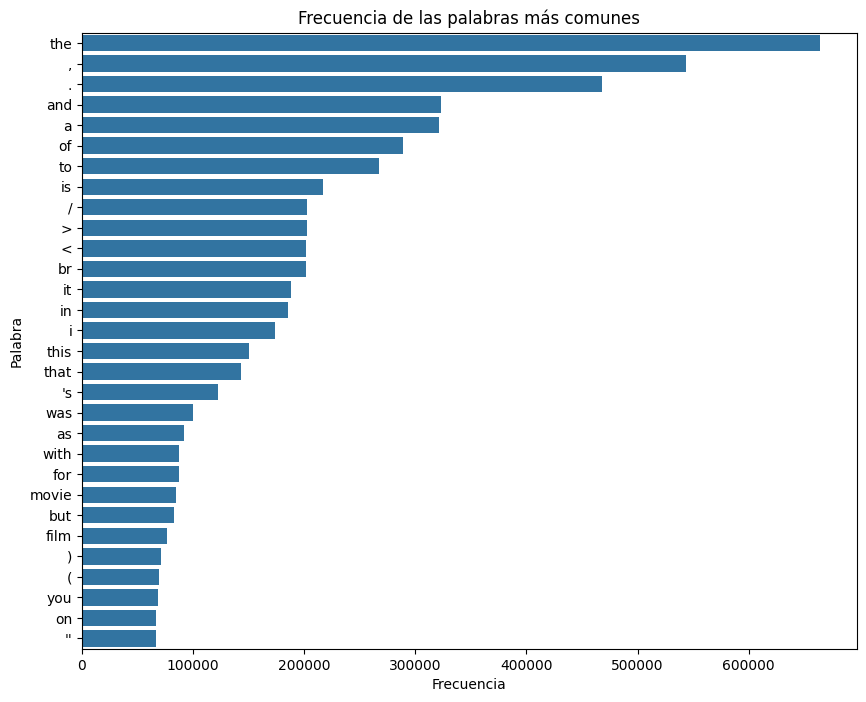

In [6]:
all_words = [word.lower() for text in data['review'] for word in nltk.word_tokenize(text)]

# Conteo de frecuencia de cada palabra
word_freq = Counter(all_words)

# Seleccionar las palabras más comunes
most_common_words = word_freq.most_common(30)

# Gráfico de barras para mostrar la frecuencia de cada palabra
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 8))
sns.barplot(y=list(words), x=list(counts), orient='h')
plt.title('Frecuencia de las palabras más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

### Eliminar StopWords

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

# Asegúrate de tener las stop words en inglés
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
df = pd.DataFrame(data)

# Función para eliminar stop words
def remove_stopwords(review):
    tokens = word_tokenize(review)
    filtered_words = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Aplicar la función al dataframe
data['review'] = data['review'].apply(remove_stopwords)
data.head(9)

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production . < br / > < br / ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically 's family little boy ( Jake ) thinks...,negative
4,Petter Mattei 's `` Love Time Money '' visuall...,positive
5,"Probably all-time favorite movie , story selfl...",positive
6,sure would like see resurrection dated Seahunt...,positive
7,"show amazing , fresh & innovative idea 70 's f...",negative
8,Encouraged positive comments film looking forw...,negative


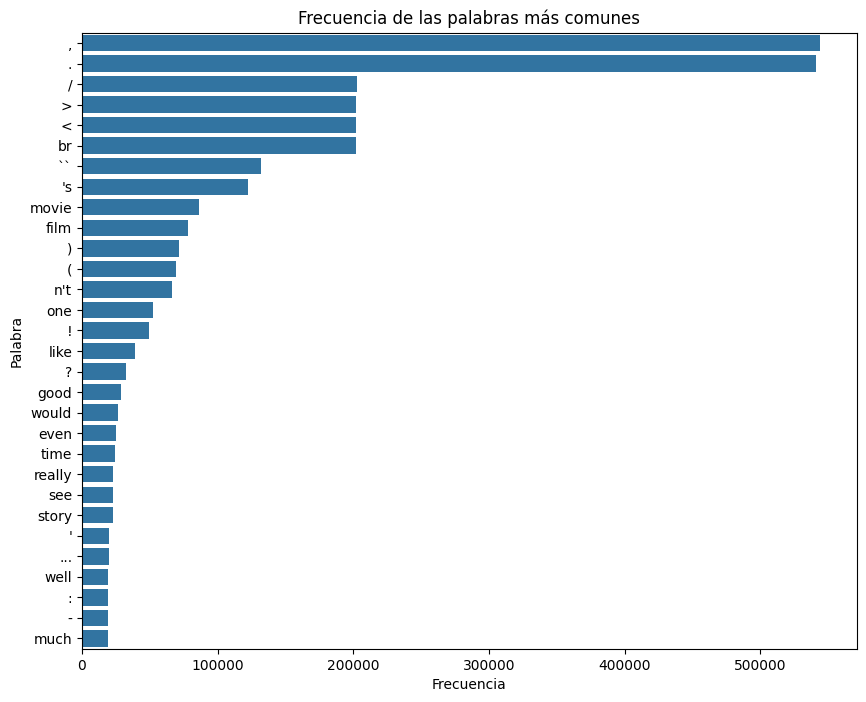

In [9]:
all_words = [word.lower() for text in data['review'] for word in nltk.word_tokenize(text)]

# Conteo de frecuencia de cada palabra
word_freq = Counter(all_words)

# Seleccionar las palabras más comunes
most_common_words = word_freq.most_common(30)

# Gráfico de barras para mostrar la frecuencia de cada palabra
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 8))
sns.barplot(y=list(words), x=list(counts), orient='h')
plt.title('Frecuencia de las palabras más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

### Eliminar etiquetas html contenidas


In [10]:
from bs4 import BeautifulSoup
import re
df = pd.DataFrame(data)

# Función para eliminar etiquetas HTML
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    # Eliminar cualquier etiqueta HTML residual
    cleaned_text = re.sub('<.*?>', '', cleaned_text)
    return cleaned_text

# Aplicar la función al dataframe
data['review'] = df['review'].apply(remove_html_tags)
data.head(9)

<ipython-input-10-5fc082968dbc>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production . filming techni...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically 's family little boy ( Jake ) thinks...,negative
4,Petter Mattei 's `` Love Time Money '' visuall...,positive
5,"Probably all-time favorite movie , story selfl...",positive
6,sure would like see resurrection dated Seahunt...,positive
7,"show amazing , fresh & innovative idea 70 's f...",negative
8,Encouraged positive comments film looking forw...,negative


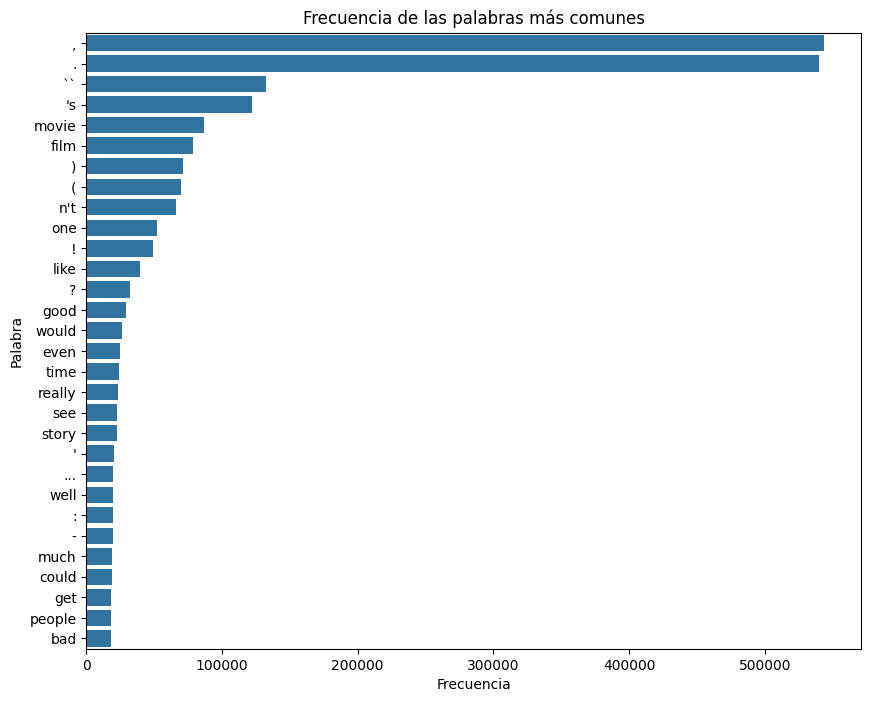

In [11]:
all_words = [word.lower() for text in data['review'] for word in nltk.word_tokenize(text)]

# Conteo de frecuencia de cada palabra
word_freq = Counter(all_words)

# Seleccionar las palabras más comunes
most_common_words = word_freq.most_common(30)

# Gráfico de barras para mostrar la frecuencia de cada palabra
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 8))
sns.barplot(y=list(words), x=list(counts), orient='h')
plt.title('Frecuencia de las palabras más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

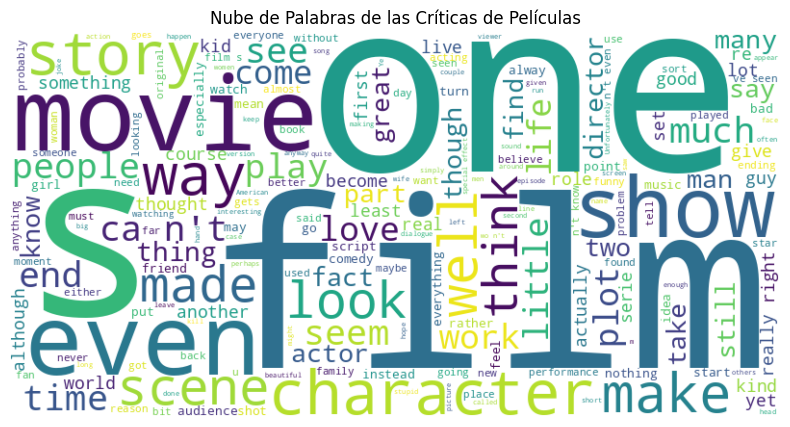

In [12]:
from wordcloud import WordCloud
# Unir todas las frases en un solo texto
text = " ".join([t for t in data['review']])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de las Críticas de Películas')
plt.show()

# Algoritmo

In [13]:
from sklearn.model_selection import train_test_split
from nltk import NaiveBayesClassifier, classify

# Train y test split

In [14]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

### Preparar los datos para el modelo NLTK Naive Bayes

In [15]:
def extract_features(text):
    words = word_tokenize(text)
    return {word: True for word in words}

train_data = [(extract_features(text), sentiment) for text, sentiment in zip(X_train, y_train)]
test_data = [(extract_features(text), sentiment) for text, sentiment in zip(X_test, y_test)]

### Train modelo

In [16]:
classifier = NaiveBayesClassifier.train(train_data)


### Evaluar el modelo

In [17]:
accuracy = classify.accuracy(classifier, test_data)
print(f'Accuracy: {accuracy:.4f}')

classifier.show_most_informative_features(10)


Accuracy: 0.8627
Most Informative Features
                   Avoid = True           negati : positi =    107.2 : 1.0
                   WORST = True           negati : positi =     71.4 : 1.0
                    2/10 = True           negati : positi =     69.1 : 1.0
                    3/10 = True           negati : positi =     66.7 : 1.0
                    Boll = True           negati : positi =     49.5 : 1.0
                     Uwe = True           negati : positi =     49.5 : 1.0
                    4/10 = True           negati : positi =     44.7 : 1.0
                steaming = True           negati : positi =     41.5 : 1.0
                    8/10 = True           positi : negati =     33.9 : 1.0
                   AVOID = True           negati : positi =     32.2 : 1.0


# Métricas

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predicted_labels=[classifier.classify(features) for (features,_) in test_data]
true_labels = [label for (_, label) in test_data]
accuracy=accuracy_score(true_labels,predicted_labels)
precision=precision_score(true_labels, predicted_labels, average='weighted')
recall=recall_score(true_labels,predicted_labels, average='weighted')
f1=f1_score(true_labels,predicted_labels, average='weighted')

results = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Modelo': ['Naive Bayes']  # Puedes cambiar el nombre del modelo si estás usando otro modelo
}

results_df = pd.DataFrame(results)

print(results_df)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)

   Accuracy  Precision  Recall  F1 Score       Modelo
0    0.8627   0.862707  0.8627  0.862695  Naive Bayes
Accuracy: 0.8627
Precision: 0.8627073037915431
Recall: 0.8627
F1 score: 0.8626953600817313


Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      4961
    positive       0.86      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Confusion Matrix:
[[4259  702]
 [ 671 4368]]


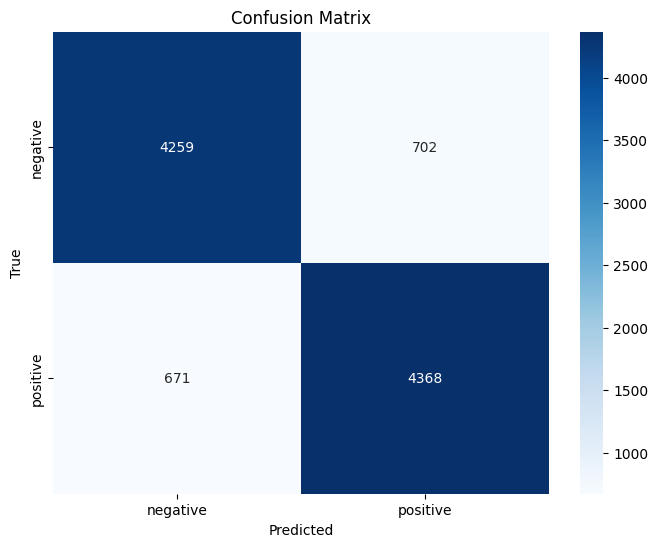

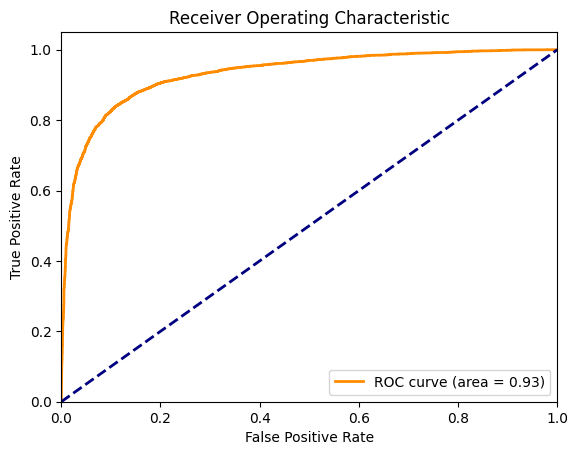

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (Your existing code for generating predicted_labels and true_labels) ...

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(cm)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.labels(), yticklabels=classifier.labels())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC (Assuming binary classification for simplicity)
# If you have multi-class, you'll need to adapt this part
if len(classifier.labels()) == 2:
    # Convert labels to binary (0 and 1) if they aren't already
    binary_true_labels = [1 if label == classifier.labels()[0] else 0 for label in true_labels]
    probas = [classifier.prob_classify(features).prob(classifier.labels()[0]) for (features, _) in test_data]
    fpr, tpr, thresholds = roc_curve(binary_true_labels, probas)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


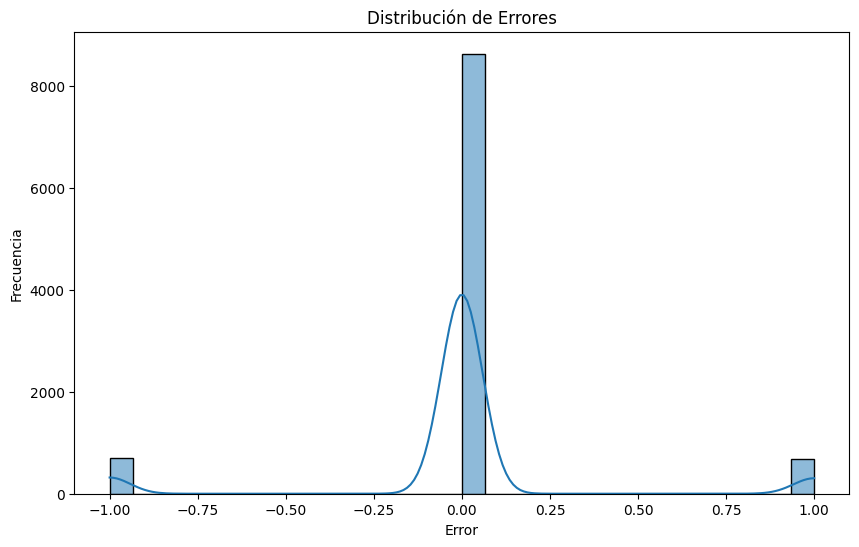

Accuracy: 0.8627


In [20]:
# Calcular errores
y_test = [1 if x[1] == 'positive' else 0 for x in test_data]
y_pred = [1 if x == 'positive' else 0 for x in predicted_labels]
errors = [y_real - y_pred for y_real, y_pred in zip(y_test, y_pred)]

# Graficar distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribución de Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# SVM
### Modelo y entrenamiento

In [23]:
# Entrenar el modelo
from sklearn.svm import SVC
from nltk.classify.scikitlearn import SklearnClassifier
# Entrenar el modelo SVM
svm_classifier = SklearnClassifier(SVC(probability=True))
svm_classifier.train(train_data)

<SklearnClassifier(SVC())>

# Evaluar el modelo

In [24]:
accuracy = classify.accuracy(svm_classifier, test_data)
print(f'Accuracy: {accuracy:.4f}')

#svm_classifier.show_most_informative_features(10)

Accuracy: 0.8935


AttributeError: 'SklearnClassifier' object has no attribute 'show_most_informative_features'

# Métricas

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predicted_labels=[svm_classifier.classify(features) for (features,_) in test_data]
true_labels = [label for (_, label) in test_data]
accuracy=accuracy_score(true_labels,predicted_labels)
precision=precision_score(true_labels, predicted_labels, average='weighted')
recall=recall_score(true_labels,predicted_labels, average='weighted')
f1=f1_score(true_labels,predicted_labels, average='weighted')

new_data = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Modelo': ['SVM']  # Puedes cambiar el nombre del modelo si estás usando otro modelo
}

results_df.loc[len(results_df)] = new_data

print(results_df)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)

   Accuracy             Precision    Recall              F1 Score       Modelo
0    0.8627              0.862707    0.8627              0.862695  Naive Bayes
1  [0.8935]  [0.8938072593028382]  [0.8935]  [0.8934655460914157]        [SVM]
Accuracy: 0.8935
Precision: 0.8938072593028382
Recall: 0.8935
F1 score: 0.8934655460914157


Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix:
[[4356  605]
 [ 460 4579]]


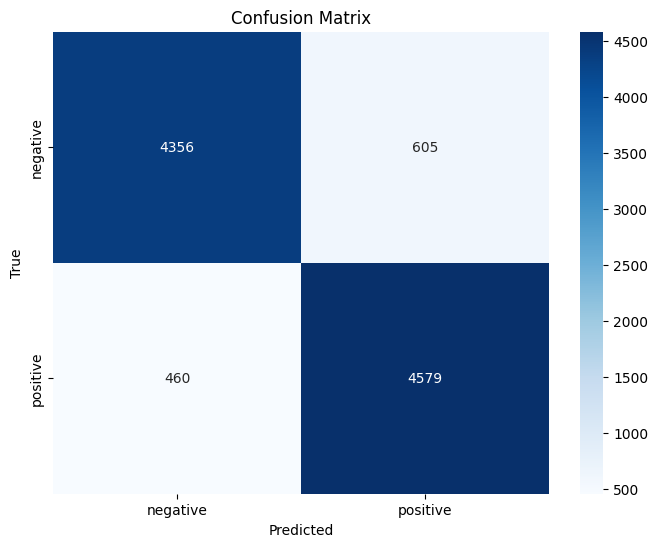

AttributeError: predict_proba is not available when probability=False

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (Your existing code for generating predicted_labels and true_labels) ...

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(cm)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.labels(), yticklabels=svm_classifier.labels())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC (Assuming binary classification for simplicity)
# If you have multi-class, you'll need to adapt this part
if len(svm_classifier.labels()) == 2:
    # Convert labels to binary (0 and 1) if they aren't already
    binary_true_labels = [1 if label == svm_classifier.labels()[0] else 0 for label in true_labels]
    probas = [svm_classifier.prob_classify(features).prob(svm_classifier.labels()[0]) for (features, _) in test_data]
    fpr, tpr, thresholds = roc_curve(binary_true_labels, probas)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


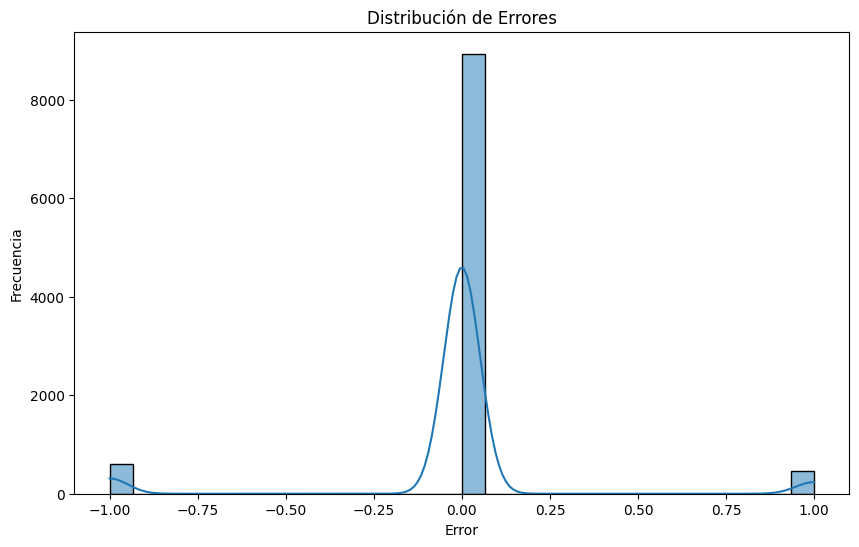

Accuracy: 0.8935


In [28]:
# Calcular errores
y_test = [1 if x[1] == 'positive' else 0 for x in test_data]
y_pred = [1 if x == 'positive' else 0 for x in predicted_labels]
errors = [y_real - y_pred for y_real, y_pred in zip(y_test, y_pred)]

# Graficar distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribución de Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Árboles de desición

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = SklearnClassifier(DecisionTreeClassifier())
dt_classifier.train(train_data)


<SklearnClassifier(DecisionTreeClassifier())>

# Métricas

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predicted_labels=[dt_classifier.classify(features) for (features,_) in test_data]
true_labels = [label for (_, label) in test_data]
accuracy=accuracy_score(true_labels,predicted_labels)
precision=precision_score(true_labels, predicted_labels, average='weighted')
recall=recall_score(true_labels,predicted_labels, average='weighted')
f1=f1_score(true_labels,predicted_labels, average='weighted')

new_data = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Modelo': ['SVM']  # Puedes cambiar el nombre del modelo si estás usando otro modelo
}

results_df.loc[len(results_df)] = new_data

print(results_df)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)

   Accuracy             Precision    Recall              F1 Score       Modelo
0    0.8627              0.862707    0.8627              0.862695  Naive Bayes
1  [0.8935]  [0.8938072593028382]  [0.8935]  [0.8934655460914157]        [SVM]
2  [0.7283]  [0.7283796093051343]  [0.7283]  [0.7283009917052479]        [SVM]
Accuracy: 0.7283
Precision: 0.7283796093051343
Recall: 0.7283
F1 score: 0.7283009917052479


Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.73      0.73      4961
    positive       0.73      0.72      0.73      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000


Confusion Matrix:
[[3639 1322]
 [1395 3644]]


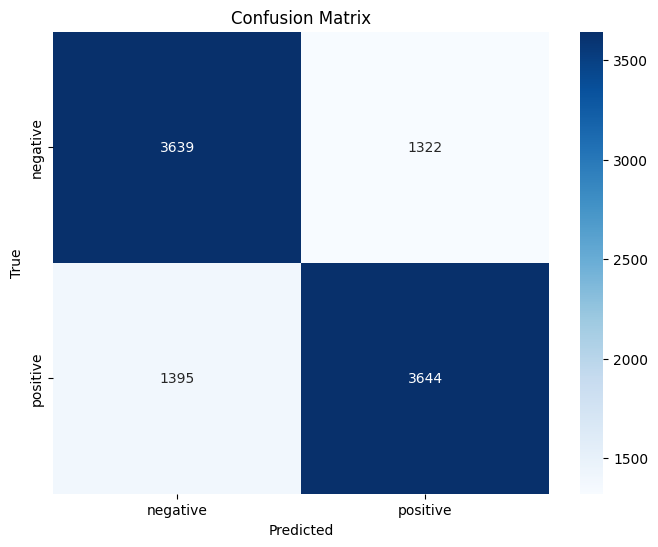

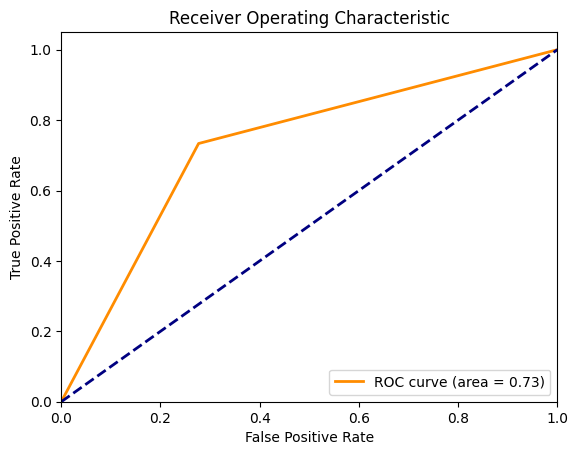

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (Your existing code for generating predicted_labels and true_labels) ...

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(cm)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt_classifier.labels(), yticklabels=dt_classifier.labels())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC (Assuming binary classification for simplicity)
# If you have multi-class, you'll need to adapt this part
if len(dt_classifier.labels()) == 2:
    # Convert labels to binary (0 and 1) if they aren't already
    binary_true_labels = [1 if label == dt_classifier.labels()[0] else 0 for label in true_labels]
    probas = [dt_classifier.prob_classify(features).prob(dt_classifier.labels()[0]) for (features, _) in test_data]
    fpr, tpr, thresholds = roc_curve(binary_true_labels, probas)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


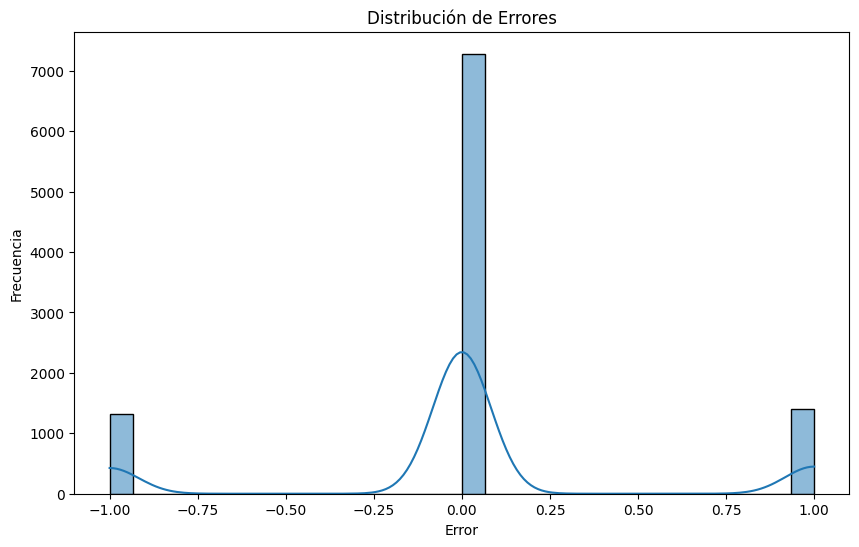

Accuracy: 0.7283


In [34]:
# Calcular errores
y_test = [1 if x[1] == 'positive' else 0 for x in test_data]
y_pred = [1 if x == 'positive' else 0 for x in predicted_labels]
errors = [y_real - y_pred for y_real, y_pred in zip(y_test, y_pred)]

# Graficar distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribución de Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

<ipython-input-43-72df5987688f>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df = results_df.applymap(convert_and_remove_brackets)


,Accuracy,Precision,Recall,F1 Score,Modelo
0,0.8627,0.862707,0.8627,0.862695,Naive Bayes
1,0.8935,0.8938072593028382,0.8935,0.8934655460914157,SVM
2,0.7283,0.7283796093051343,0.7283,0.7283009917052479,DT


from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('Accuracy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('Precision').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('Recall').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('F1 Score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

TypeError: '<' not supported between instances of 'str' and 'float'

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Precision'].value_counts()
    for x_label, grp in _df_12.groupby('Accuracy')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Accuracy')
_ = plt.ylabel('Precision')

TypeError: '<' not supported between instances of 'str' and 'float'

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Recall'].value_counts()
    for x_label, grp in _df_13.groupby('Precision')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Precision')
_ = plt.ylabel('Recall')

TypeError: '<' not supported between instances of 'str' and 'float'

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['F1 Score'].value_counts()
    for x_label, grp in _df_14.groupby('Recall')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Recall')
_ = plt.ylabel('F1 Score')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Modelo'].value_counts()
    for x_label, grp in _df_15.groupby('F1 Score')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('F1 Score')
_ = plt.ylabel('Modelo')

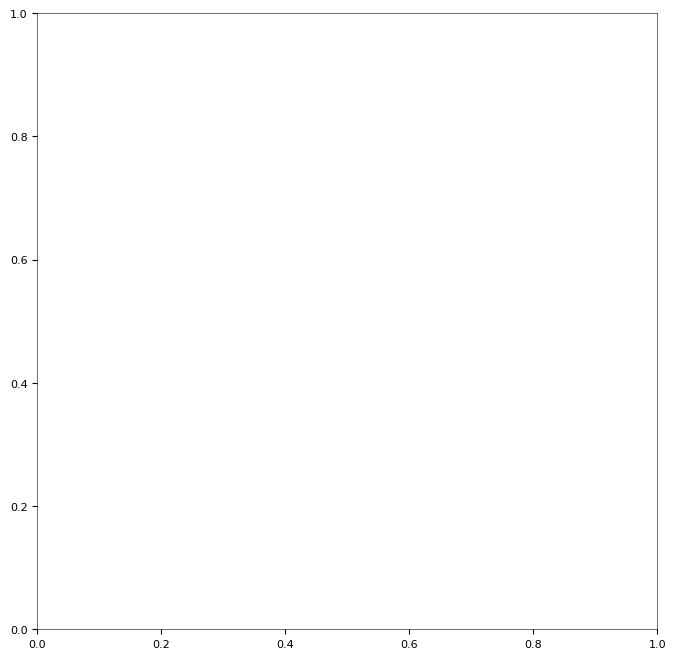

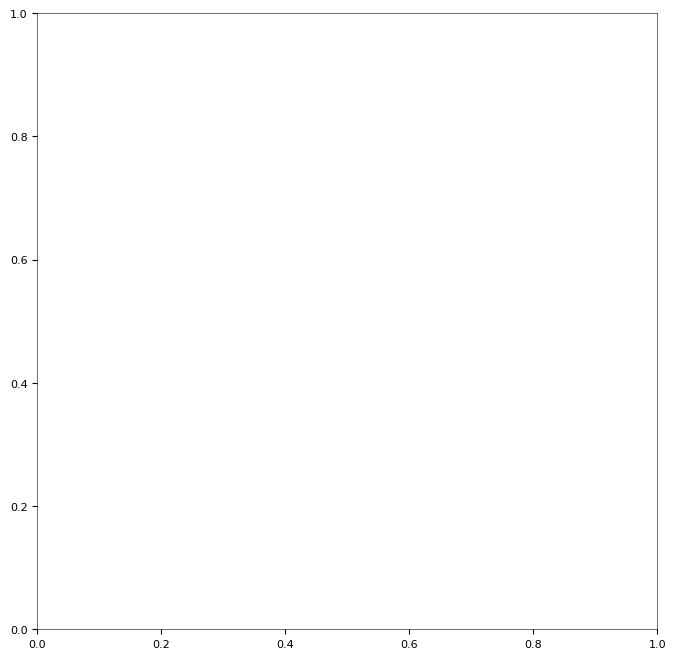

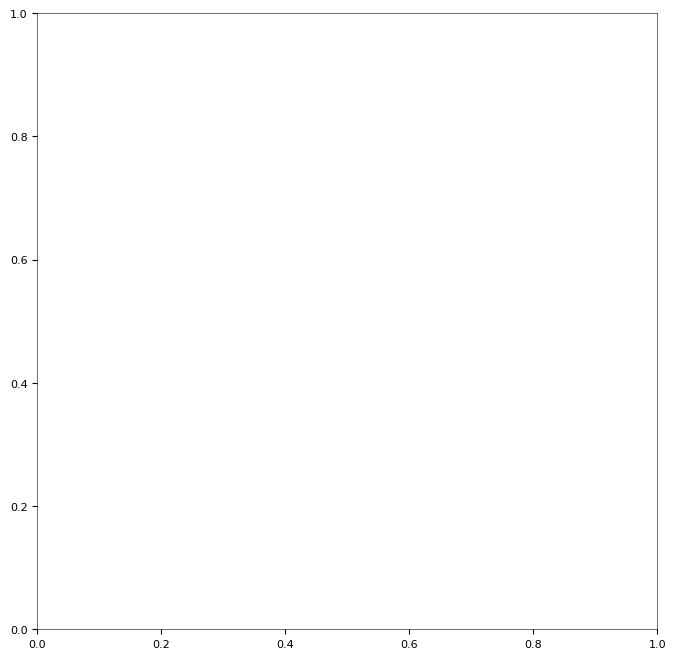

In [43]:
results_df2=results_df.copy()
# Función para convertir listas en cadenas y eliminar corchetes
def convert_and_remove_brackets(x):
    if isinstance(x, list):
        x = str(x)
    if isinstance(x, str):
        return x.replace('[', '').replace(']', '')
    return x

# Aplicar la función a todo el DataFrame
results_df = results_df.applymap(convert_and_remove_brackets)
results_df['Modelo'][2]='DT'
results_df['Modelo'][1]='SVM'
results_df.head()


<Axes: xlabel='Modelo'>

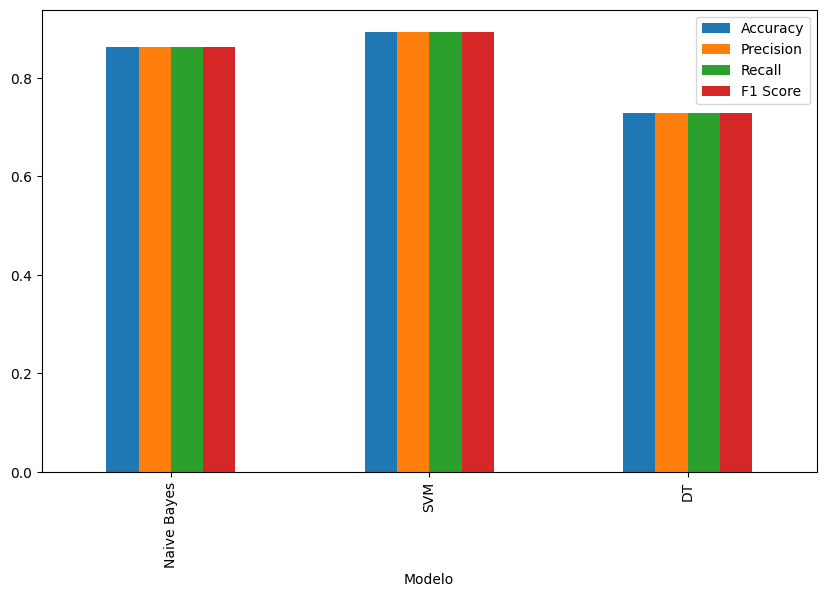

In [47]:
results_df['Modelo'] = results_df['Modelo'].astype(str)
results_df['Accuracy']=results_df['Accuracy'].astype(float)
results_df['Precision']=results_df['Precision'].astype(float)
results_df['Recall']=results_df['Recall'].astype(float)
results_df['F1 Score']=results_df['F1 Score'].astype(float)
results_df.plot(x='Modelo', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], kind='bar', figsize=(10, 6))